In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

### Phase basis   
    

In [26]:
#Solve in phase basis
Nphi = 601
Ej = 1
Ec = 1
El = 0.1
ng = 0
phi_ext = np.pi
phi = np.linspace(-4,4,2*Nphi+1)*np.pi
phi_op = np.diag(phi)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
def hamiltonian_phase(Ec, Ej, ng):
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*Qobj(phi_op/2-phi_ext).cosm()+0.5*El*Qobj(phi_op**2)
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej, ng).eigenstates()

(-4.0, 4.0)

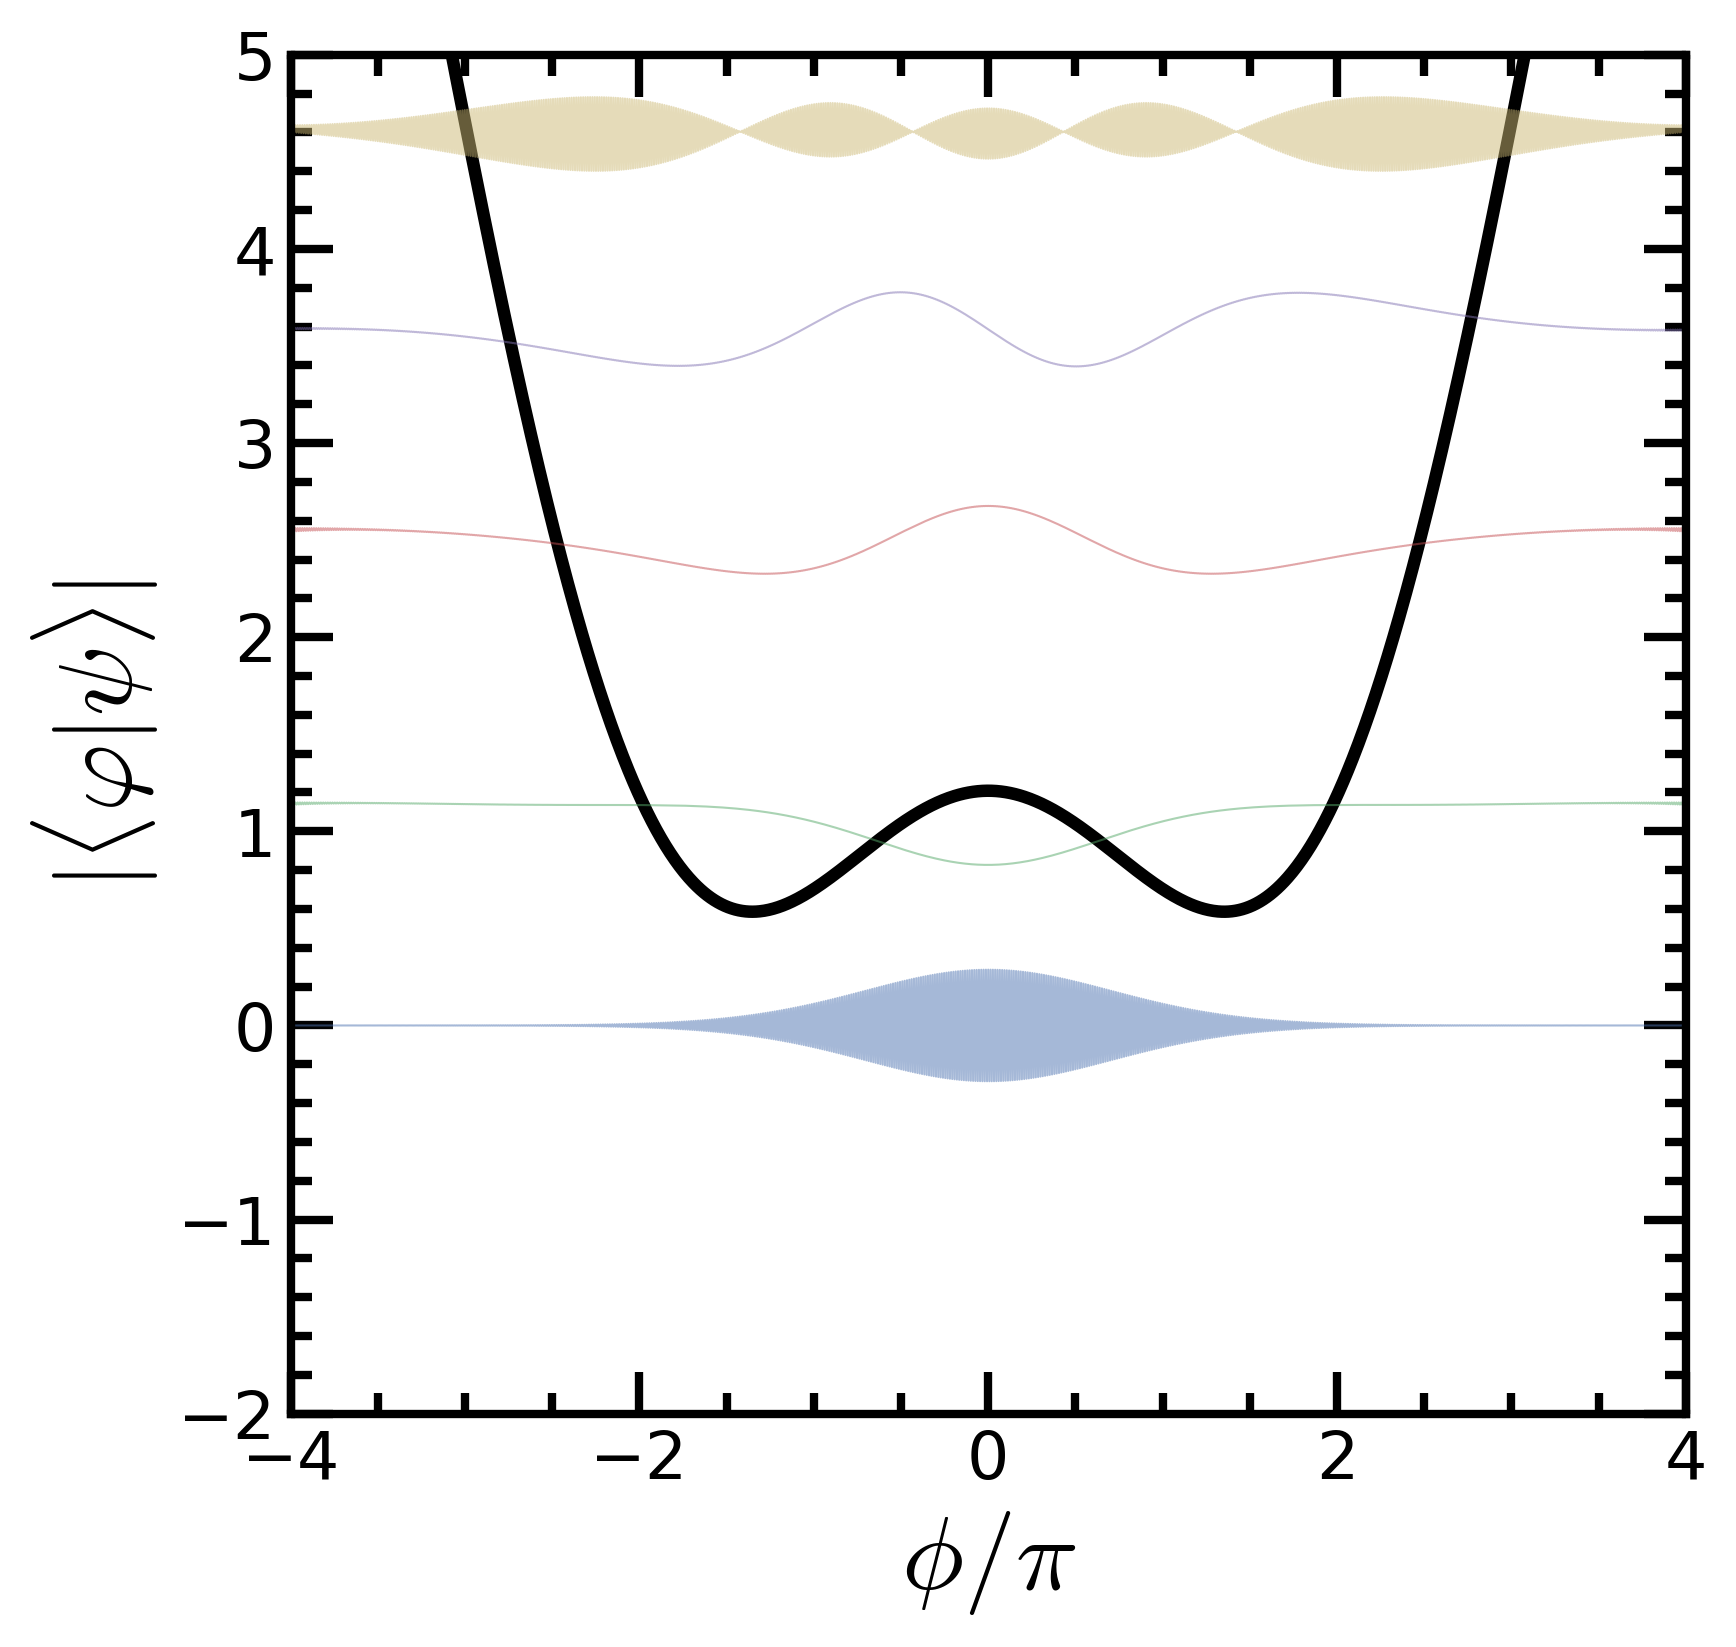

In [29]:
plt.figure(figsize =[6,6])
plt.plot(phi/np.pi, -Ej*np.cos(phi/2-phi_ext)+El*0.5*phi**2-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, np.real(wavefunction[state_to_plot].full()[:,0])*4+energies[state_to_plot]-energies[0], alpha = 0.5, linewidth = 0.5) 
plt.ylim([-2,5])
plt.xlabel('$\phi / \pi$')
plt.ylabel(r'$|\langle \varphi|\psi \rangle | $')
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])